# **Pencarian Greedy Best-First untuk Routing Hirarkis**

**Langkah 1: Tentukan Kelas Node**

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
class Node:

    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

**Langkah 2: Terapkan Algoritma Pencarian Greedy Best-First**

In [2]:
def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    priority_queue = []
    heapq.heappush(priority_queue, Node(start, heuristic[start]))

    visited = set()
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)

        # Eksplorasi tetangga dalam region yang sama dulu
        current_region = region_map[current_node]
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Eksplorasi tetangga di region lain setelahnya
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None


**Langkah 3: Rekonstruksi Jalur**

In [3]:
def reconstruct_path(path, start, goal):
    current = goal
    result_path = []
    while current is not None:
        result_path.append(current)
        current = path[current]
    result_path.reverse()
    return result_path

**Langkah 4: Visualisasikan Grafik dan Jalur**

In [6]:
def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))

    node_colors = ['lightgreen' if node in path else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=4000,
              font_size=15, font_color='black', font_weight='bold', edge_color='gray')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)

    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()

**Langkah 5: Tentukan Grafik dan Nilai Heuristik**

In [5]:
# Graph dengan hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K', 'M', 'E'],
    'G': ['L', 'M'],
    'H': [],
    'I': [],
    'J': [],
    'K': [],
    'L': [],
    'M': []
}

# Heuristic
heuristic = {
    'A': 8, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'F': 5,
    'G': 4, 'H': 3, 'I': 2, 'J': 1, 'K': 3, 'L': 2, 'M': 1
}

# Region Map
region_map = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 2, 'H': 2,
    'I': 2, 'J': 2, 'K': 3, 'L': 3, 'M': 3
}

# Posisi Node
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (0.5, 2), 'F': (0.5, 2), 'G': (1.5, 2), 'H': (2, 3),
    'I': (-1, 3), 'J': (0, 3), 'K': (1, 3), 'L': (2, 3), 'M': (3, 3)
}

**Langkah 6: Lakukan pencarian dan Visualisasikan Nilainya**

Path from A to M: ['A', 'C', 'G', 'M']


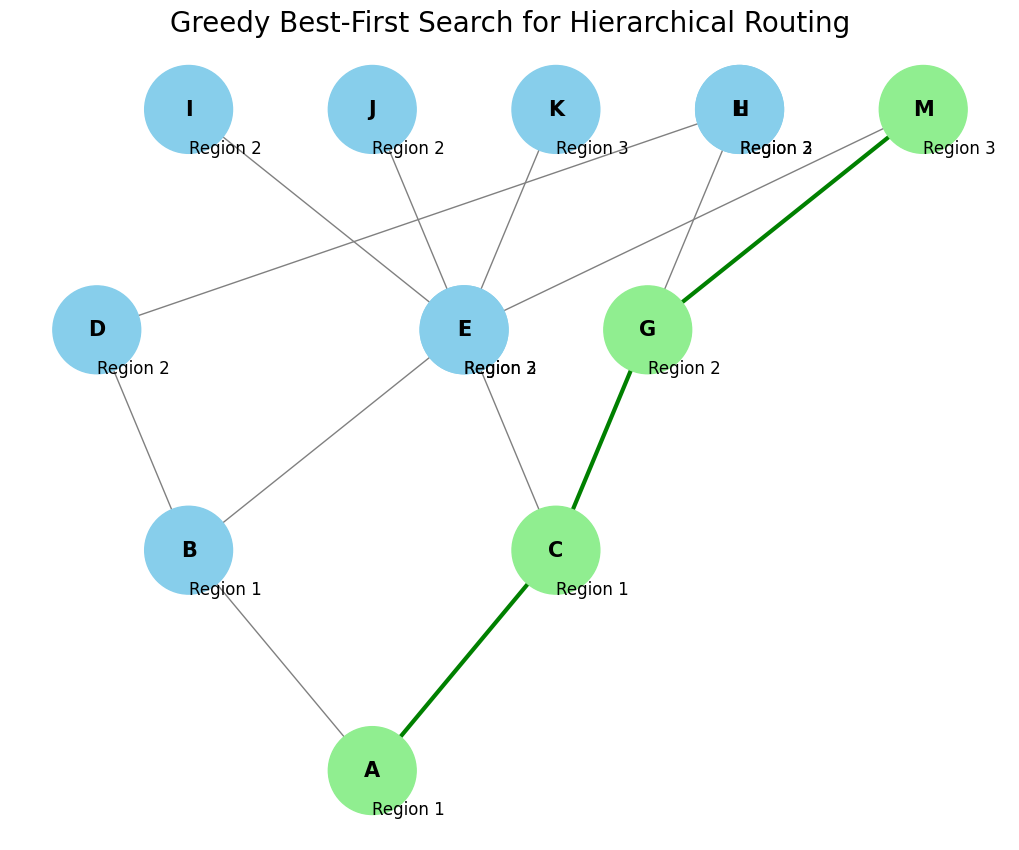

In [7]:
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualisasi
visualize_graph(graph, result_path, pos, region_map)

**TUGAS C**


---

Pada contoh kasus diatas menerapkan Greedy Best-First Search (GBFS) dengan Hierarchical Routing, di mana pencarian difokuskan pada simpul dalam wilayah yang sama sebelum berpindah ke wilayah lain. Dengan menggunakan algoritma heuristic untuk memilih simpul dengan estimasi terbaik menuju tujuan.

# **Studi Kasus: Pencarian Rute Tercepat dalam Peta Kota**

Sebuah perusahaan logistik ingin menemukan rute tercepat dari gudang pusat ke tujuan pengiriman di kota. Peta kota direpresentasikan sebagai graf, di mana simpul adalah lokasi, dan edge menunjukkan jalan dengan bobot berdasarkan perkiraan jarak langsung ke tujuan. Greedy Best-First Search (GBFS) digunakan untuk memilih simpul dengan nilai heuristik terkecil (jarak langsung ke tujuan) hingga mencapai lokasi pengiriman.

**Perbedaan BFS dan Greedy BFS :**
1. **BFS :** Menelusuri semua node sebelum berpindah pada node selanjutnya, tidak menggunakan Heuristic, cukup berat jika dijalankan pada graf yang lebih besar karena harus mengekplorasi semua jalur.
2. **Greedy BFS :** Memilih node dengan heuristic terbaik, eksekusi lebih cepat karena langsung menuju node tujuan, menggunakan heuristic untuk memilih jalur terbaik.


Path from A to J: ['A', 'C', 'F', 'I', 'J']


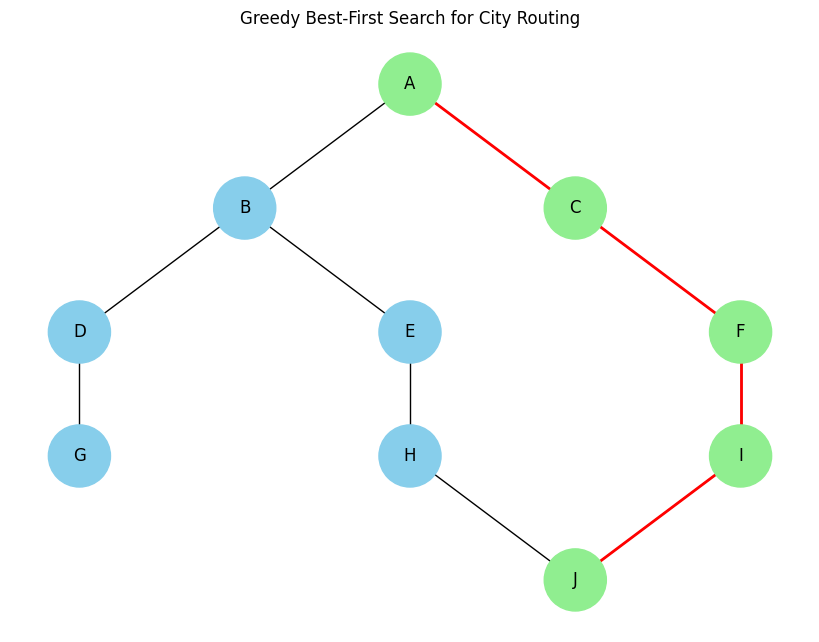

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

def greedy_best_first_search(graph, start, goal, heuristic):
    priority_queue = []
    heapq.heappush(priority_queue, Node(start, heuristic[start]))

    visited = set()
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)

        for neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None

def reconstruct_path(path, start, goal):
    current = goal
    result_path = []
    while current is not None:
        result_path.append(current)
        current = path[current]
    result_path.reverse()
    return result_path

def visualize_graph(graph, path, pos):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(8, 6))
    node_colors = ['lightgreen' if node in path else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Greedy Best-First Search for City Routing")
    plt.show()

# Graf jalan dalam kota
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['G'],
    'E': ['H'],
    'F': ['I'],
    'G': [],
    'H': ['J'],
    'I': ['J'],
    'J': []
}

# Heuristic (jarak langsung ke tujuan 'J')
heuristic = {'A': 8, 'B': 6, 'C': 5, 'D': 4, 'E': 4, 'F': 3, 'G': 2, 'H': 2, 'I': 1, 'J': 0}

# Posisi node untuk visualisasi
pos = {'A': (0, 4), 'B': (-1, 3), 'C': (1, 3), 'D': (-2, 2), 'E': (0, 2), 'F': (2, 2),
       'G': (-2, 1), 'H': (0, 1), 'I': (2, 1), 'J': (1, 0)}

# Jalankan algoritma
start_node = 'A'
goal_node = 'J'
result_path = greedy_best_first_search(graph, start_node, goal_node, heuristic)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualisasi hasil
visualize_graph(graph, result_path, pos)